# MNIST Data
### Dataset is from Kaggle's Digit Recognizer Task

## Import Libraries

In [ ]:
import pandas as pd
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras.layers import Dense, Conv2D, MaxPool2D, Flatten, BatchNormalization, Dropout, Activation
from tensorflow.keras.models import Sequential
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import LearningRateScheduler
from sklearn.model_selection import train_test_split

## Allot GPU 

In [2]:
gpus = tf.config.experimental.list_physical_devices('GPU')
if gpus:
  try:
    tf.config.experimental.set_virtual_device_configuration(gpus[0], [tf.config.experimental.VirtualDeviceConfiguration(memory_limit=2000)])
  except RuntimeError as e:
    print(e)

## Importing Data and Changing it into the right format
### Note: Test data has no labels, its predictions have to submitted to Kaggle. Hence, the training set is split later on to obtain a validation data set

In [3]:
df = pd.read_csv('train.csv')
df_test = pd.read_csv('test.csv')

In [4]:
df.shape, df_test.shape

((42000, 785), (28000, 784))

In [5]:
x=df.iloc[:,1:].copy().values.reshape(df.shape[0],28,28)/255
x_test=df_test.copy().values.reshape(df_test.shape[0],28,28)/255

In [6]:
X=x[:,:,:,np.newaxis]
X_test=x_test[:,:,:,np.newaxis]

In [7]:
y=df.iloc[:,0]
y_test=df_test.iloc[:,0]

## Visualize a couple of images

Text(0.5, 0, 'Test Image 1')

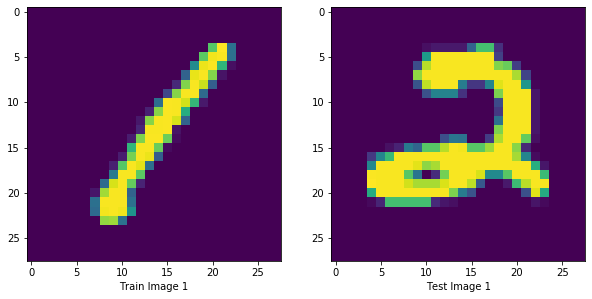

In [8]:
fig=plt.figure(figsize=(10,5))
ax0=fig.add_subplot(1,2,1)
ax1=fig.add_subplot(1,2,2)
ax0.imshow(x[0])
ax0.set_xlabel('Train Image 1')
ax1.imshow(x_test[0])
ax1.set_xlabel('Test Image 1')

## Split the Training Data into two parts, the latter used for validation

In [9]:
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.1)

## Creation of the model
### Uses Convolution layers along with Batch Normalization and Relu activations. Dropouts are used for regularization and a Dense layer is used in the end to obtain the final label

In [47]:
model = Sequential()

model.add(Conv2D(32, kernel_size = 3, input_shape = (28, 28, 1)))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Conv2D(32, kernel_size = 3))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Conv2D(32, kernel_size = 5, strides=2, padding='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.4))

model.add(Conv2D(64, kernel_size = 3))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Conv2D(64, kernel_size = 3))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Conv2D(64, kernel_size = 5, strides=2, padding='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.4))

model.add(Conv2D(128, kernel_size = 4))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Flatten())
model.add(Dropout(0.4))
model.add(Dense(10, activation='softmax'))

In [48]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_21 (Conv2D)           (None, 26, 26, 32)        320       
_________________________________________________________________
batch_normalization_21 (Batc (None, 26, 26, 32)        128       
_________________________________________________________________
activation_21 (Activation)   (None, 26, 26, 32)        0         
_________________________________________________________________
conv2d_22 (Conv2D)           (None, 24, 24, 32)        9248      
_________________________________________________________________
batch_normalization_22 (Batc (None, 24, 24, 32)        128       
_________________________________________________________________
activation_22 (Activation)   (None, 24, 24, 32)        0         
_________________________________________________________________
conv2d_23 (Conv2D)           (None, 12, 12, 32)       

## Creation of the ImageDataGenerator object for the purpose of data augmentation during training

In [49]:
datagen = ImageDataGenerator(
        rotation_range=10,  
        zoom_range = 0.10,  
        width_shift_range=0.1, 
        height_shift_range=0.1)

## Fitting of the model

In [50]:
opt=tf.keras.optimizers.Adam()
annealer = LearningRateScheduler(lambda x: 1e-3 * 0.95 ** x)

In [51]:
model.compile(optimizer=opt,loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [52]:
model.fit(datagen.flow(X_train,y_train,batch_size=128),validation_data=(X_val,y_val),
          epochs=50,steps_per_epoch=X_train.shape[0]//128,callbacks=[annealer])

Epoch 1/50
295/295 [==============================] - 7s 24ms/step - loss: 0.5566 - accuracy: 0.8236 - val_loss: 2.2928 - val_accuracy: 0.3455 - lr: 0.0010
Epoch 2/50
295/295 [==============================] - 7s 24ms/step - loss: 0.1412 - accuracy: 0.9599 - val_loss: 0.0484 - val_accuracy: 0.9869 - lr: 9.5000e-04
Epoch 3/50
295/295 [==============================] - 7s 24ms/step - loss: 0.1044 - accuracy: 0.9704 - val_loss: 0.0665 - val_accuracy: 0.9814 - lr: 9.0250e-04
Epoch 4/50
295/295 [==============================] - 7s 23ms/step - loss: 0.0856 - accuracy: 0.9762 - val_loss: 0.0356 - val_accuracy: 0.9890 - lr: 8.5737e-04
Epoch 5/50
295/295 [==============================] - 7s 23ms/step - loss: 0.0714 - accuracy: 0.9794 - val_loss: 0.0905 - val_accuracy: 0.9755 - lr: 8.1451e-04
Epoch 6/50
295/295 [==============================] - 7s 23ms/step - loss: 0.0666 - accuracy: 0.9799 - val_loss: 0.0375 - val_accuracy: 0.9888 - lr: 7.7378e-04
Epoch 7/50
295/295 [========================

## Plotting the results

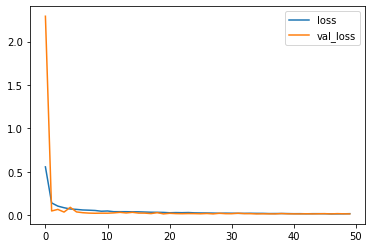

In [53]:
df=pd.DataFrame(model.history.history)
df[['loss','val_loss']].plot()

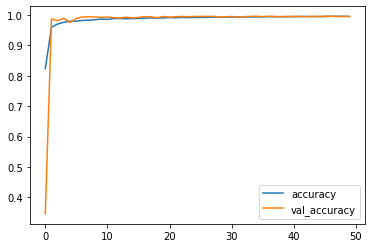

In [54]:
df[['accuracy','val_accuracy']].plot()

## Predicting the labels for the test data

In [55]:
predictions = model.predict(X_test)

## Cleaning and saving the test data labels to csv

In [56]:
test_predictions = pd.DataFrame(predictions.argmax(axis=1))
test_predictions.columns=['Label']
test_predictions.index=np.arange(1,28001)
test_predictions.index.name = 'ImageID'
test_predictions

,Label
ImageID,
1,2
2,0
3,9
4,0
5,3
...,...
27996,9
27997,7
27998,3


In [57]:
test_predictions.to_csv('submission.csv')